In [1]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks

In [103]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\PUND\BF4 PUND PE Heating\360.05.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms)
0,-7.0190,-7.0190,-2.314750,-0.023148,1.0,0.05
1,-2.8229,-2.8229,-2.310897,-0.023109,2.0,0.10
2,3.5095,3.5095,-2.303527,-0.023035,3.0,0.15
3,-1.2207,-1.2207,-2.295486,-0.022955,4.0,0.20
4,2.6703,2.6703,-2.291298,-0.022913,5.0,0.25
5,3.1281,3.1281,-2.288115,-0.022881,6.0,0.30
6,2.3651,2.3651,-2.285100,-0.022851,7.0,0.35
7,3.6621,3.6621,-2.277226,-0.022772,8.0,0.40
8,7.5531,7.5531,-2.274546,-0.022745,9.0,0.45
9,6.0272,6.0272,-2.265668,-0.022657,10.0,0.50


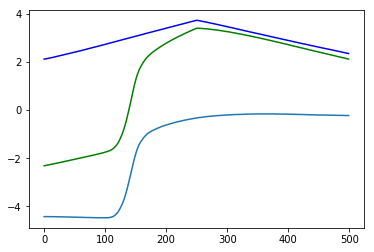

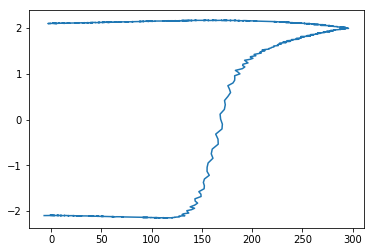

,1st pulse,2nd pulse,Drive Voltage,P1-P2,P from switching
0,-2.314750,2.110379,-7.0190,-4.425129,-2.097647
1,-2.310897,2.113730,-2.8229,-4.424627,-2.097145
2,-2.303527,2.119425,3.5095,-4.422952,-2.095471
3,-2.295486,2.123446,-1.2207,-4.418932,-2.091450
4,-2.291298,2.131487,2.6703,-4.422785,-2.095303


In [104]:
#上半部分
P1 = list()
E = list()
P2  =list()
P_diff = list()

i = 0

for j in range(500):
    P1.append(df.loc[i, 'Measured Polarization'])
    P2.append(df.loc[i+500, 'Measured Polarization'])
    P_diff.append(df.loc[i, 'Measured Polarization']-df.loc[i+500, 'Measured Polarization'])
    E.append(df.loc[i, '#Drive Voltage'])
    i = i +1

plt.plot(P1, "g-")
plt.plot(P2, "b-")
plt.plot(P_diff)
plt.show()

dictionary={"1st pulse":P1,
"2nd pulse":P2,
"P1-P2":P_diff,
"Drive Voltage":E,
               }
New_df=pd.DataFrame(dictionary)

Pfromswitching = New_df['P1-P2']- 0.5*(New_df.loc[0,'P1-P2']+ New_df.loc[499,'P1-P2'])
plt.plot(New_df['Drive Voltage'],Pfromswitching)
plt.show()

New_df.insert(len(New_df.columns), "P from switching", Pfromswitching)
New_df.head(5)

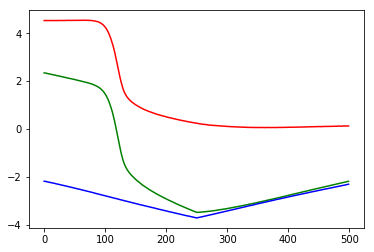

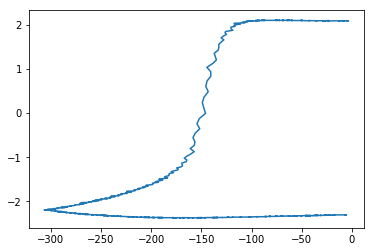

,1st pulse,2nd pulse,Drive Voltage,P1-P2,P from switching
0,2.339878,-2.190285,-4.6539,4.530163,2.097647
1,2.339040,-2.191290,-3.3569,4.530330,2.097815
2,2.334182,-2.195813,-7.5531,4.529995,2.097479
3,2.328319,-2.200336,-9.6130,4.528655,2.096140
4,2.321283,-2.205697,-7.6294,4.526980,2.094464


In [70]:
# 下半部分

P1 = list()
E = list()
P2  =list()
P_diff = list()

i = 1000

for j in range(500):
    P1.append(df.loc[i, 'Measured Polarization'])
    P2.append(df.loc[i+500, 'Measured Polarization'])
    P_diff.append(df.loc[i, 'Measured Polarization']-df.loc[i+500, 'Measured Polarization'])
    E.append(df.loc[i, '#Drive Voltage'])
    i = i +1
plt.plot(P1, "g-")
plt.plot(P2, "b-")
plt.plot(P_diff, "r-")
plt.show()

dictionary={"1st pulse":P1,
"2nd pulse":P2,
"P1-P2":P_diff,
"Drive Voltage":E,
               }
New_df_down=pd.DataFrame(dictionary)

Pfromswitching = New_df_down['P1-P2']- New_df_down.loc[0,'P1-P2'] + New_df.loc[499,'P from switching']
plt.plot(New_df_down['Drive Voltage'],Pfromswitching)
plt.show()

New_df_down.insert(len(New_df_down.columns), "P from switching", Pfromswitching)
New_df_down.head(5)

1000
500
500


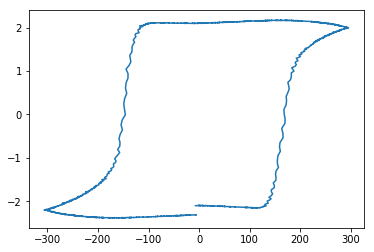

In [105]:
print(len(Full_df))
print(len(New_df_down))
print(len(New_df))

plt.plot(Full_df['Drive Voltage'], Full_df['P from switching'])
plt.show()

# Full_df.head(800)

In [106]:
New_df.loc[498,'P from switching']
# print(type(Full_df.loc[0,'P from switching']))

2.0998265000000003

In [120]:
#从文件名提取温度with regular expression
path = r'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[359.93, 360.05, 360.41, 360.8, 361.17, 361.4, 361.72, 362.03, 362.38, 362.65, 363.04, 363.37, 363.62, 363.96, 364.16, 364.54, 364.75, 364.92, 365.18, 365.41, 365.69, 365.92, 366.19, 366.35, 366.65, 366.91, 367.12, 367.4, 367.63, 367.89, 368.17, 368.4, 368.64, 368.88, 369.1, 369.37, 369.61, 369.91, 370.14, 370.39, 370.58, 370.89, 371.11, 371.37, 371.62, 371.83, 372.08, 372.33, 372.6, 372.82, 373.06, 373.35, 373.53, 373.79, 374.06, 374.3, 374.57, 374.79, 375.07, 375.27, 375.55, 375.77, 376.04, 376.31, 376.47, 376.82, 377.08, 377.25, 377.52, 377.9, 378.06, 378.34, 378.62, 378.88, 379.02, 379.25, 379.64, 379.79, 380.06, 380.29, 380.54, 380.79, 381.0, 381.36, 381.54, 381.84, 381.99, 382.38, 382.46, 382.79, 383.06, 383.32, 383.51, 383.8, 384.01, 384.35, 384.43, 384.8, 384.98, 385.23, 385.44, 385.74, 385.99, 386.22, 386.5, 386.64, 386.96, 387.2, 387.53, 387.73, 387.89, 388.26, 388.44, 388.7, 388.92, 389.22, 389.4, 389.61, 389.96, 390.13, 390.43, 390.63, 390.88, 391.16, 391.39, 391.69, 391.87

In [121]:
#批量操作所有文件
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_PUND\\R_delta P_T\\PfromSwitching_individual files'
files = glob(path + "/*.tab")

T = list()
PatEmax = list()
Pat0 = list()

filecounter = 0

for file in files:

    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    print(temperature[filecounter])
    P1 = list()
    E = list()
    P2  =list()
    P_diff = list()
    i = 0
    
    for j in range(500):
        P1.append(df.loc[i, 'Measured Polarization'])
        P2.append(df.loc[i+500, 'Measured Polarization'])
        P_diff.append(df.loc[i, 'Measured Polarization']-df.loc[i+500, 'Measured Polarization'])
        E.append(df.loc[i, '#Drive Voltage'])
        i = i +1
        dictionary={"1st pulse":P1,
        "2nd pulse":P2,
        "P1-P2":P_diff,
        "Drive Voltage":E,
                       }
    New_df=pd.DataFrame(dictionary)
    Pfromswitching = New_df['P1-P2']- 0.5*(New_df.loc[0,'P1-P2']+ New_df.loc[499,'P1-P2'])
    New_df.insert(len(New_df.columns), "P from switching", Pfromswitching)

    P1 = list()
    E = list()
    P2  =list()
    P_diff = list()

    i = 1000

    for j in range(500):
        P1.append(df.loc[i, 'Measured Polarization'])
        P2.append(df.loc[i+500, 'Measured Polarization'])
        P_diff.append(df.loc[i, 'Measured Polarization']-df.loc[i+500, 'Measured Polarization'])
        E.append(df.loc[i, '#Drive Voltage'])
        i = i +1
        dictionary={"1st pulse":P1,
        "2nd pulse":P2,
        "P1-P2":P_diff,
        "Drive Voltage":E,
                       }
    New_df_down=pd.DataFrame(dictionary)
    Pfromswitching = New_df_down['P1-P2']- New_df_down.loc[0,'P1-P2'] + New_df.loc[499,'P from switching']
    New_df_down.insert(len(New_df_down.columns), "P from switching", Pfromswitching)
    
    file_name = output_path +'\\'+ str(temperature[filecounter])+'.csv'
    New_df.to_csv(file_name, index=None)    
    
    filecounter = filecounter +1
       
    T.append(temperature[filecounter])    
    PatEmax.append(New_df.loc[249,'P from switching'])
    Pat0.append(New_df.loc[499,'P from switching'])


359.93
360.05
360.41
360.8
361.17
361.4
361.72
362.03
362.38
362.65
363.04
363.37
363.62
363.96
364.16
364.54
364.75
364.92
365.18
365.41
365.69
365.92
366.19
366.35
366.65
366.91
367.12
367.4
367.63
367.89
368.17
368.4
368.64
368.88
369.1
369.37
369.61
369.91
370.14
370.39
370.58
370.89
371.11
371.37
371.62
371.83
372.08
372.33
372.6
372.82
373.06
373.35
373.53
373.79
374.06
374.3
374.57
374.79
375.07
375.27
375.55
375.77
376.04
376.31
376.47
376.82
377.08
377.25
377.52
377.9
378.06
378.34
378.62
378.88
379.02
379.25
379.64
379.79
380.06
380.29
380.54
380.79
381.0
381.36
381.54
381.84
381.99
382.38
382.46
382.79
383.06
383.32
383.51
383.8
384.01
384.35
384.43
384.8
384.98
385.23
385.44
385.74
385.99
386.22
386.5
386.64
386.96
387.2
387.53
387.73
387.89
388.26
388.44
388.7
388.92
389.22
389.4
389.61
389.96
390.13
390.43
390.63
390.88
391.16
391.39
391.69
391.87
392.16
392.34
392.73
392.9
393.15
393.39
393.67
393.9
394.12
394.37
394.64
394.88
395.08


IndexError: list index out of range

In [122]:
dic={"P from switch at Emax":PatEmax,
     "P from switch at 0":Pat0,
  "T":T}
dt=pd.DataFrame(dic)

In [123]:
dt.head()

,P from switch at 0,P from switch at Emax,T
0,2.150834,1.929209,360.05
1,2.097647,1.989601,360.41
2,2.150081,1.917567,360.80
3,2.136931,1.983151,361.17
4,2.138272,1.994708,361.40


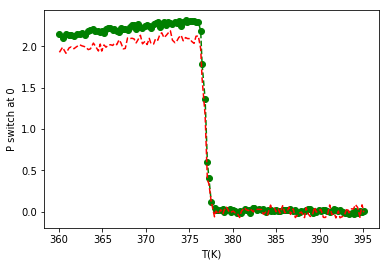

In [129]:

plt.plot(dt['T'],dt['P from switch at 0'],'go--')
plt.plot(dt['T'],dt['P from switch at Emax'],'r--')
plt.xlabel('T(K)')
plt.ylabel('P switch at 0')
plt.ticklabel_format(style='sci', axis='y')
# plt.axis([358,397,0,4])

plt.show()


In [130]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_PUND\R_delta P_T\PfromSwitching_T.txt', index=None)